In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
#Importing these libraries allows for the manipulation of arrays, graph plotting and curve fitting
from scipy import asarray as ar,exp
#?Converts data into an array for exponential-like model
from sklearn.linear_model import LinearRegression
#Linear regression package
from sklearn.metrics import mean_squared_error, r2_score
from array import array
import statistics

In [2]:
def linear(m, x, b):
    'Will return a slope m and y-intercept b for given values of x sent to the function'
    return m*x + b
def exponential(x, a, k, b):
    ''''Will return the function y = a exp(k*x) + b for any data set x sent to the function'''
    return a*np.exp(k*x) + b
#first order kinetics
def gauss_function(x,a1,b1,c1,o):
    'Will return a normal distribution curve for a data set x and constants a, b, and c'
    return a1*np.exp(-(x-b1)**2/(2*c1**2)) + o
def gauss_function_ext(x,a1,a2,b1,b2,c1,c2,o):
    'Will return two normal distribution curves for a data set x and constants a, b, and c'
    return a1*np.exp(-(x-b1)**2/(2*c1**2))+a2*np.exp(-(x-b2)**2/(2*c2**2)) + o
#c = sigma
#would like to know when to specifically define mean and sigma

# Linear Data Set Example

Text(0.5, 0, 'Glucose Concentration (mM)')

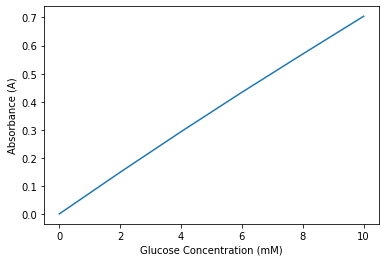

In [3]:
conc, absorb = np.loadtxt("lineardataset.txt", usecols=(0,1), unpack = True)
plt.figure(1)
plt.plot(conc, absorb)
plt.ylabel("Absorbance (A)")
plt.xlabel("Glucose Concentration (mM)")
#I loaded data from a txt file and designated the x and y values of data as an array
#(unpack = true) allows me to designate x, y at the beginning
#I labeled the y and x axis

predicted y values:
[[0.00828571]
 [0.14857143]
 [0.28885714]
 [0.42914286]
 [0.56942857]
 [0.70971429]]
intercept: [0.00828571]
slope: [[0.07014286]]
R squared value: 0.9996384266250692


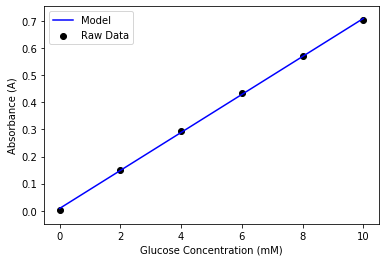

In [4]:
#Setting up a linear model to fit the data
#Turning original variables into arrays
x = np.array([conc]).reshape((-1, 1))
#x array is required to be 2-D (aka have one column and as many rows as necessary to "work" with y)
y = np.array([absorb]).reshape((-1, 1))
#The computer didn't like when I didn't also reshape the y variables, but based on the tutorial, not sure why this is required
#Generally think it changes the amount of elements that you get??
#Creating a linear regression object
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.scatter(x, y, color='black')
plt.plot(x, y_predict, color='blue', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Absorbance (A)")
plt.xlabel("Glucose Concentration (mM)")

plt.show()
#curve_fit = can put multiple response (y) points at one x-axis point
#test this
#Resource for replicating LINEST function
#look more into linear regression package
#perr = standard deviation
#Need to know how to grab numbers and multiply/divide accordingly
#Next I want to have calculations of standard deviation (will need a replicate set of data), %RSD, and confidence interval for adding error bars; basically all calculations for AFMs

In [5]:
yint = lr.intercept_[0]
print("y intercept is ", yint)
slope = lr.coef_[0]
print("slope is", slope)
#before adding the [0], saved it as an array that has one axis and one data point
LOD = (3*statistics.stdev([1.3, 1.1, 1.3])) / (slope)
print(LOD)

y intercept is  0.00828571428571434
slope is [0.07014286]
[4.93863774]


predicted y values:
[[1.4730958  1.46670895 1.56334455]
 [1.65201588 1.65095692 1.7400364 ]
 [1.83093597 1.8352049  1.91672826]
 [2.00985605 2.01945287 2.09342011]
 [2.18877613 2.20370084 2.27011196]
 [2.54661629 2.57219679 2.62349567]
 [2.90445646 2.94069274 2.97687938]
 [3.26229662 3.30918868 3.33026309]
 [3.62013678 3.67768463 3.68364679]
 [4.33581711 4.41467652 4.39041421]
 [5.94609784 6.07290828 5.98064089]
 [8.62989907 8.83662787 8.6310187 ]]
intercept: [1.4730958  1.46670895 1.56334455]
slope: [[0.17892008]
 [0.18424797]
 [0.17669185]]
R squared value: 0.995258335198442


C:\Users\krbar\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


ValueError: x and y must be the same size

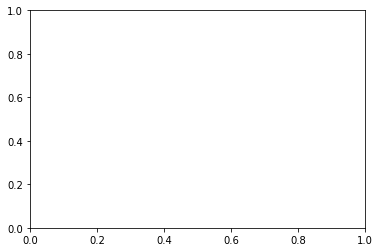

In [6]:
#Trying out multiple linear regression
x = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 25, 40]
y = [[1.3, 1.1, 1.3], [1.5, 1.5, 1.9], [1.9, 2.1, 2], [2.2, 2.2, 2], [2.3, 2.2, 2.3], [2.5, 2.6, 2.6], [2.9, 3, 3], [3.2, 3.2, 3.4], [3.7, 3.8, 3.6], [4.2, 4.5, 4.6], [6.2, 6, 5.9], [8.5, 8.8, 8.6]]
x, y = np.array(x).reshape((-1, 1)), np.array(y)
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.scatter(x, y, color='black')
plt.plot(x, y_predict, color='blue', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Peak Area Units (A.U.)")
plt.xlabel("Compound Concentration (pg/mL)")

In [ ]:
#Try 2
from numpy.polynomial.polynomial import polyfit
x = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 6, 6, 6, 8, 8, 8, 10, 10, 10, 12, 12, 12, 16, 16, 16, 25, 25, 25, 40, 40, 40])
y = np.array([1.3, 1.1, 1.3, 1.5, 1.5, 1.9, 1.9, 2.1, 2, 2.2, 2.2, 2, 2.3, 2.2, 2.3, 2.5, 2.6, 2.6, 2.9, 3, 3, 3.2, 3.2, 3.4, 3.7, 3.8, 3.6, 4.2, 4.5, 4.6, 6.2, 6, 5.9, 8.5, 8.8, 8.6])

b, m = polyfit(x, y, '.')

plt.plot(x, y, '.')
plt.plot(x, x * m + b, '-')
plt.show()

In [ ]:
#Try 3
x = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 6, 6, 6, 8, 8, 8, 10, 10, 10, 12, 12, 12, 16, 16, 16, 25, 25, 25, 40, 40, 40])
y = np.array([1.3, 1.1, 1.3, 1.5, 1.5, 1.9, 1.9, 2.1, 2, 2.2, 2.2, 2, 2.3, 2.2, 2.3, 2.5, 2.6, 2.6, 2.9, 3, 3, 3.2, 3.2, 3.4, 3.7, 3.8, 3.6, 4.2, 4.5, 4.6, 6.2, 6, 5.9, 8.5, 8.8, 8.6])
x, y = np.array(x).reshape((-1, 1)), np.array(y).reshape((-1, 1))
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.scatter(x, y, color='black')
plt.plot(x, y_predict, color='blue', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Peak Area Units (A.U.)")
plt.xlabel("Compound Concentration (pg/mL)")

predicted y values:
[[1.50104977]
 [1.68100307]
 [1.86095637]
 [2.04090968]
 [2.22086298]
 [2.58076958]
 [2.94067619]
 [3.3005828 ]
 [3.6604894 ]
 [4.38030261]
 [5.99988234]
 [8.69918188]]
intercept: [1.50104977]
slope: [[0.1799533]]
R squared value: 0.9976394542763032


Text(0.5, 0, 'Compound Concentration (pg/mL)')

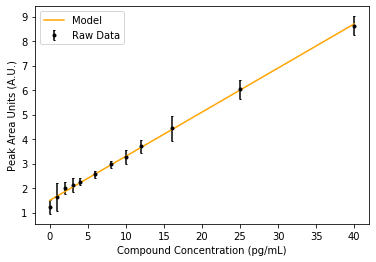

In [14]:
#Comparing with averaged points
x = np.array([0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 25, 40])
y = np.array([[(1.3 + 1.1 + 1.3)/(3)], [(1.5 + 1.5 + 1.9)/(3)], [(1.9 + 2.1 + 2)/(3)], [(2.2 + 2.2 + 2)/(3)], [(2.3 + 2.2 + 2.3)/(3)], [(2.5 + 2.6 + 2.6)/(3)], [(2.9 + 3 + 3)/(3)], [(3.2 + 3.2 + 3.4)/(3)], [(3.7 + 3.8 + 3.6)/(3)], [(4.2 + 4.5 + 4.6)/(3)], [(6.2 + 6 + 5.9)/(3)], [(8.5 + 8.8 + 8.6)/(3)]])
x, y = np.array(x).reshape((-1, 1)), np.array(y).reshape((-1, 1))
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.errorbar(x, y, yerr=[err1, err2, err3, err4, err5, err6, err7, err8, err9, err10, err11, err12], color='black', capsize=1, marker ='.', linestyle = 'None')
plt.plot(x, y_predict, color='orange', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Peak Area Units (A.U.)")
plt.xlabel("Compound Concentration (pg/mL)")


In [13]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    Parameters
    ----------
    x, y : scalar or array-like
        The data positions.
    
    xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data point.
        - shape(2,N): Separate - and + values for each bar. First row
            contains the lower errors

In [15]:
#Manually getting standard deviation and variance try 1
#This doesn't seem to get the right numbers
dataset1 = [1.3, 1.1, 1.3]
print('Mean:', np.mean(dataset1))
print('Standard Deviation:', np.std(dataset1))

#Try 2
def stdev(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    stdev = math.sqrt(sum(deviations) / (n-1))
    return stdev

stdev([1.3, 1.1, 1.3])
#Yay!!!!!

def RSD(mean, stdev):
    return (stdev/mean)*(100)

def CI(t, stdev, n):
    return (t*stdev)/(math.sqrt(n))

err1 = CI(4.303, statistics.stdev([1.3, 1.1, 1.3]), 3)
err2 = CI(4.303, statistics.stdev([1.5, 1.5, 1.9]), 3)
err3 = CI(4.303, statistics.stdev([1.9, 2.1, 2]), 3)
err4 = CI(4.303, statistics.stdev([2.2, 2.2, 2]), 3)
err5 = CI(4.303, statistics.stdev([2.3, 2.2, 2.3]), 3)
err6 = CI(4.303, statistics.stdev([2.5, 2.6, 2.6]), 3)
err7 = CI(4.303, statistics.stdev([2.9, 3, 3]), 3)
err8 = CI(4.303, statistics.stdev([3.2, 3.2, 3.4]), 3)
err9 = CI(4.303, statistics.stdev([3.7, 3.8, 3.6]), 3)
err10 = CI(4.303, statistics.stdev([4.2, 4.5, 4.6]), 3)
err11 = CI(4.303, statistics.stdev([6.2, 6, 5.9]), 3)
err12 = CI(4.303, statistics.stdev([8.5, 8.8, 8.6]), 3)

#C++ better for processing computational data and does things faster bc doesn't hold things in memory as much

Mean: 1.2333333333333334
Standard Deviation: 0.09428090415820632


In [5]:
#Putting all the data points into an array to make easier to work with
data = np.array([[1,2,3], [4,5,6]])
print(data)
#Accessing the first set of data points; data[1] would get second set and so forth...
data[0]
#Getting the number of data points (if doing mean/stdev manually)
np.size(data[0])
#Ways to directly axis the mean std of the full dataset; shouldn't need to for loop
print(np.mean(data, axis=1))
np.std(data, axis=1)

[[1 2 3]
 [4 5 6]]
[2. 5.]


array([0.81649658, 0.81649658])

In [17]:
#rows -- this is what I'll want for my data
print(np.mean(data, axis=1))
#columns
print(np.mean(data, axis=0))
#Goal -- calculate confidence intervals again
#con_interval = (an array that is 12 elements long)
#t table in python?? Google

[2. 5.]
[2.5 3.5 4.5]


In [10]:
data1 = np.array([[1.3, 1.1, 1.3], [1.5, 1.5, 1.9], [1.9, 2.1, 2], [2.2, 2.2, 2], [2.3, 2.2, 2.3], [2.5, 2.6, 2.6], [2.9, 3, 3], [3.2, 3.2, 3.4], [3.7, 3.8, 3.6], [4.2, 4.5, 4.6], [6.2, 6, 5.9], [8.5, 8.8, 8.6]])
print(np.std(data1, axis=1))
t1=4.303
print(np.size(data1[0]))
def CI(t, stdev, n):
    return (t*stdev)/(math.sqrt(n))
print(CI(t1, np.std(data1, axis=1), np.size(data1[0])))
#WHOOOOO!! I do think this is population standard deviation, but I still got the general concept!

[0.0942809  0.18856181 0.08164966 0.0942809  0.04714045 0.04714045
 0.04714045 0.0942809  0.08164966 0.16996732 0.12472191 0.12472191]
3
[0.23422565 0.46845131 0.20284537 0.23422565 0.11711283 0.11711283
 0.11711283 0.23422565 0.20284537 0.4222563  0.30985141 0.30985141]


In [ ]:
#Another try that works
statistics.stdev([1.3, 1.1, 1.3])

# Exponential Data Set Example

In [ ]:
#Loading up 2021 dataset file with minimal glancing at model fitting lab
#Always check the original data file in Jupyter if error messages pop up; could be an unnecessary space or character causing loading problems
#Loading in data as arrays requires 'unpack = true' command because...
raw_time, raw_volume = np.loadtxt("Mentos and Coke 2-2021.csv", delimiter=',', usecols=(0,1), unpack = True)
plt.plot(raw_time,raw_volume)

In [ ]:
#Cutting off data not relevant to model fitting using index function
#Re-name arrays to represent new graph
index = 12
plt.plot(raw_time[index:], raw_volume[index:])
time = raw_time[index:]
volume = raw_volume[index:]
plt.ylabel("Volume (mL)")
plt.xlabel("Time (sec)")

In [ ]:
popt_first, pcov_first = curve_fit(exponential, time, volume)
print(popt_first)
#First line
popt_first, pcov_first = curve_fit(exponential, time, volume, p0=(750, -1, 0))
print(popt_first)
#Second line
#With these commands, I ask the computer to give optimized parameters for the fitting of my raw data to an exponential model
#The first printed line delivers the computer's predictions for a, k, and b based on the computer's search algorith. These 
    #numbers (especially a) are a bit out of range based on my raw data; the computer most likely picked a far away point on
    #the parameter search surface from the real value and "rolled downhill" when picking the predicted values
    #popt = sum of squares residuals minimized
#a = the top of the curve on the y-axis (defines shape), k = rate of growth (+) or decay (-) (defines overall curvature), b = where the baseline hits
#The second printed line represents the computer's new predictions for a, k, and b with my restrictions. The a parameter 
    #becomes slightly more reasonable.
perr_first = np.sqrt(np.diag(pcov_first))
#Computes one standard deviation (?absolute) of the parameters
#Look up commands for computing  more standard deviations? Related to confidence intervals?
print(perr_first)
#Third line
plt.bar(('a','k','b'), perr_first/popt_first*100)
#Now we calculate the uncertainty (relative error) of the a, k, and b values in the exponential decay and place the percent error based on the real values in bar graph form (allowing us to compare to base values)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")
#overflow = encountered a big number; then went a different direction

In [ ]:
#Directly comparing raw data and model with residuals
plt.subplot(212)
#The plt.subplot functions allow the graphs to be stacked in a certain arrangement and to share an x-axis
#212 = 2 rows, 1 column, work on the second plot
#The top plot overlays the generated expontential model (based on parameters set above in the previous cell) on the raw data graph
plt.plot(time, volume-exponential(time, popt_first[0],popt_first[1], popt_first[2]),'g')
#The bottom plot (green color defined by 'g') is the residual plot based on the model and raw data (data generated by above line)
plt.ylabel("Residuals")
plt.subplot(211, sharex=plt.gca())
#now working on the first plot
#gca = 
plt.scatter(time,volume, color='orange')
plt.plot(time, exponential(time, popt_first[0],popt_first[1], popt_first[2]))
plt.legend(("Raw Data", "Model"))
plt.ylabel("Volume (mL)")
plt.xlabel("Time (sec)")
plt.subplots_adjust(hspace=0)

# Gaussian Data Set Example

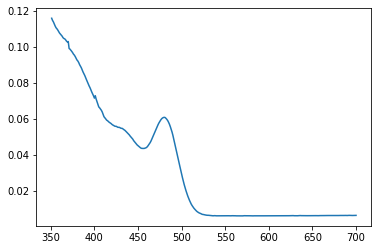

In [18]:
#Remember model fitting link I have
wvlngth, intensity = np.loadtxt("30s031320.txt", usecols=(0,1), unpack = True)
index = 350
plt.plot(wvlngth[:index], intensity[:index])

In [ ]:
x=ar(wvlngth[:index])
y=ar(intensity[:index])
n=len(x)
#the number of data points

def gauss_function(x,a1,a2,b1,b2,c1,c2,o):
    return a1*np.exp(-(x-b1)**2/(2*c1**2))+a2*np.exp(-(x-b2)**2/(2*c2**2)) + o
#c = sigma
#used multiple variables because we expected multiple Gaussian peaks
#would like to know when to specifically define mean and sigma

popt,pcov = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
#defining all constants, not x
#notice x and y are the variables I defined above
#p0 = initial guess for the parameters
#pcov = estimated covariance of popt (the estimate)

plt.figure(1)
plt.plot(x,y,'b+:',label='data')
#This is plotting the original data with the new x and y defined variables


plt.figure(2)
plt.plot(x, gauss_function(x, *popt), 'ro:', label='fit')
#optimizes parameter values so the sum of squared residuals is minimized (if y data was subtracted)
#The fit of the data assuming multiple Gaussians

#can redfine x axis; change the index
plt.figure(3)
x_adjust = ar(wvlngth)
#Success! But this x-axis still isn't big enough for the whole curve --> how to add values?
plt.plot(x_adjust, popt[0]*np.exp(-(x_adjust-popt[2])**2/(2*popt[4]**2)))
#I think this is optimizing a1, b1, and c1 specifically and focusing on the curve itself
#I couldn't just use gauss_function because it defines all variables; I specifically wanted a1, b1, c1
plt.ylabel("Absorbance (a.u.)", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)


popt_sec, pcov_sec = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
perr_sec = np.sqrt(np.diag(pcov_sec))
#Now I can find relative error with estimated parameters and their standard deviations
print(popt_sec)
print(perr_sec)
plt.figure(4)
plt.bar(('a1','a2','b1','b2','c1','c2','o'), perr_sec/popt_sec*100)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")

#Now want to compare to "Model" way of fitting a Gaussian function
#learning how numpy arrays and broadcasting works (comp sci theory)

[1.19725984e-01 3.84588012e-02 3.12503118e+02 4.80428715e+02
 8.46752592e+01 1.38168875e+01 5.38158698e-03]
[3.01979144e-03 6.87647959e-04 4.62311309e+00 2.41934146e-01
 2.46453025e+00 3.11253810e-01 2.08086823e-04]


Text(0.5, 0, 'Parameters of Model Equation')

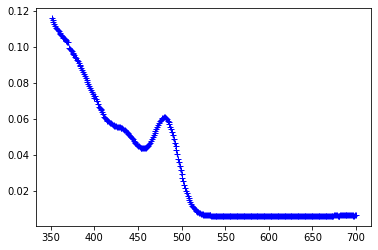

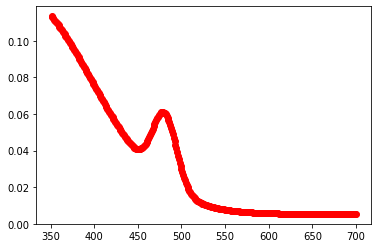

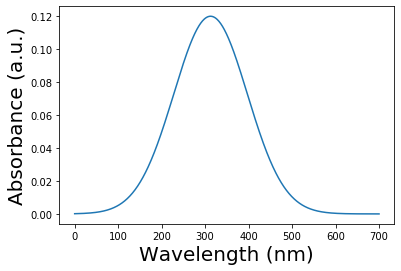

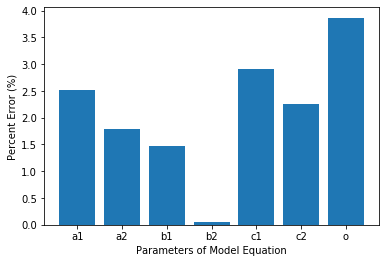

In [19]:
x=ar(wvlngth[:index])
y=ar(intensity[:index])
n=len(x)
#the number of data points

def gauss_function(x,a1,a2,b1,b2,c1,c2,o):
    return a1*np.exp(-(x-b1)**2/(2*c1**2))+a2*np.exp(-(x-b2)**2/(2*c2**2)) + o
#c = sigma
#used multiple variables because we expected multiple Gaussian peaks
#would like to know when to specifically define mean and sigma

popt,pcov = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
#defining all constants, not x
#notice x and y are the variables I defined above
#p0 = initial guess for the parameters
#pcov = estimated covariance of popt (the estimate)

plt.figure(1)
plt.plot(x,y,'b+:',label='data')
#This is plotting the original data with the new x and y defined variables


plt.figure(2)
plt.plot(x, gauss_function(x, *popt), 'ro:', label='fit')
#optimizes parameter values so the sum of squared residuals is minimized (if y data was subtracted)
#The fit of the data assuming multiple Gaussians

#can redfine x axis; change the index
plt.figure(3)
x_adjust = np.arange(0, 701, 1)
#SUCCESS WITH USING A NEW NUMPY ARRAY TOOL!
plt.plot(x_adjust, popt[0]*np.exp(-(x_adjust-popt[2])**2/(2*popt[4]**2)))
#I think this is optimizing a1, b1, and c1 specifically and focusing on the curve itself
#I couldn't just use gauss_function because it defines all variables; I specifically wanted a1, b1, c1
plt.ylabel("Absorbance (a.u.)", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)


popt_sec, pcov_sec = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
perr_sec = np.sqrt(np.diag(pcov_sec))
#Now I can find relative error with estimated parameters and their standard deviations
print(popt_sec)
print(perr_sec)
plt.figure(4)
plt.bar(('a1','a2','b1','b2','c1','c2','o'), perr_sec/popt_sec*100)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")

#Now want to compare to "Model" way of fitting a Gaussian function
#learning how numpy arrays and broadcasting works (comp sci theory)

In [23]:
x = np.arange(4)
print(x)
#2-D array
xx=x.reshape(4,1)
print(x.shape)
print(xx.shape)

[0 1 2 3]
(4,)
(4, 1)
